Linear regression by using Deep Neural network: Implement Boston housing price
prediction problem by Linear regression using Deep Neural network. Use Boston House price prediction dataset.

In [1]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing DataSet and take a look at Data
data = pd.read_csv('housing_data - housing_data.csv')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
# Handle null values by filling them with the mean of the respective columns
data.fillna(data.mean(), inplace=True)

In [4]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


(506, 14)

<AxesSubplot:xlabel='MEDV', ylabel='Density'>

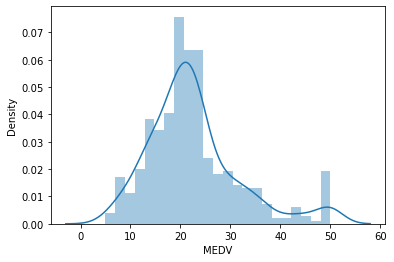

In [7]:
import seaborn as sns
sns.distplot(data.MEDV)

<AxesSubplot:xlabel='MEDV'>

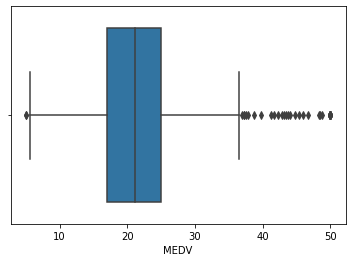

In [8]:
sns.boxplot(data.MEDV)

In [9]:
correlation = data.corr()
correlation.loc['MEDV']

CRIM      -0.379695
ZN         0.365943
INDUS     -0.478657
CHAS       0.179882
NOX       -0.427321
RM         0.695360
AGE       -0.380223
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.721975
MEDV       1.000000
Name: MEDV, dtype: float64

<AxesSubplot:>

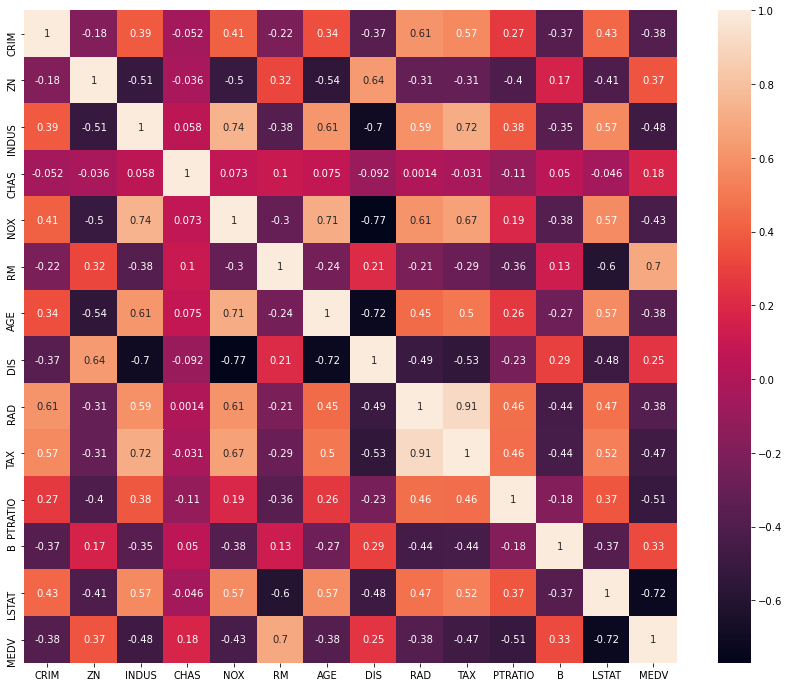

In [10]:
# plotting the heatmap
import matplotlib.pyplot as plt
fig,axes = plt.subplots(figsize=(15,12))
sns.heatmap(correlation,square = True,annot = True)

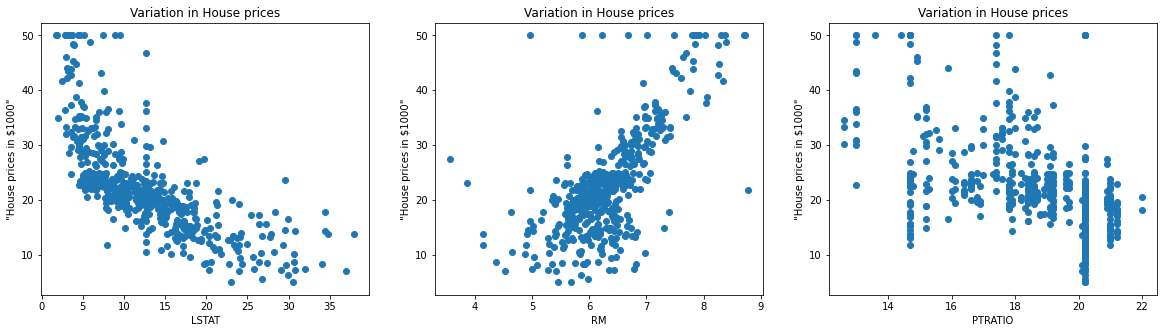

In [11]:
# Checking the scatter plot with the most correlated features
plt.figure(figsize = (20,5))
features = ['LSTAT','RM','PTRATIO']
for i, col in enumerate(features):
  plt.subplot(1, len(features) , i+1)
  x = data[col]
  y = data.MEDV
  plt.scatter(x, y, marker='o')
  plt.title("Variation in House prices")
  plt.xlabel(col)
  plt.ylabel('"House prices in $1000"')

In [12]:
# Splitting the dependent feature and independent feature
#X = data[['LSTAT','RM','PTRATIO']]
X = data.iloc[:,:-1]
y= data.MEDV

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming you have data stored in some variables X and y
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can proceed with the code you provided
# Importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std
#Linear Regression

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#Fitting the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor.fit(X_train,y_train)

LinearRegression()

In [14]:
#Prediction on the test dataset
y_pred = regressor.predict(X_test)
# Predicting RMSE the Test set results
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

5.001766890194158


In [15]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.6588520195508162


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Epoch 1/100
12/12 [==============================] - 2s 44ms/step - loss: 593.3365 - mae: 22.5031 - val_loss: 492.1255 - val_mae: 20.7200
Epoch 2/100
12/12 [==============================] - 0s 9ms/step - loss: 525.0057 - mae: 20.9747 - val_loss: 399.8764 - val_mae: 18.5050
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 378.6923 - mae: 17.3772 - val_loss: 222.7657 - val_mae: 13.2538
Epoch 4/100
12/12 [==============================] - 0s 10ms/step - loss: 155.3056 - mae: 10.3306 - val_loss: 52.9837 - val_mae: 4.9532
Epoch 5/100
12/12 [==============================] - 0s 9ms/step - loss: 67.5092 - mae: 6.4644 - val_loss: 48.6647 - val_mae: 4.4646
Epoch 6/100
12/12 [==============================] - 0s 9ms/step - loss: 37.0765 - mae: 4.5780 - val_loss: 56.6724 - val_mae: 4.6085
Epoch 7/100
12/12 [==================

12/12 [==============================] - 0s 9ms/step - loss: 5.3113 - mae: 1.7609 - val_loss: 27.5410 - val_mae: 3.4120
Epoch 62/100
12/12 [==============================] - 0s 8ms/step - loss: 5.2426 - mae: 1.7450 - val_loss: 24.2072 - val_mae: 3.1952
Epoch 63/100
12/12 [==============================] - 0s 8ms/step - loss: 5.2041 - mae: 1.7553 - val_loss: 25.6998 - val_mae: 3.3223
Epoch 64/100
12/12 [==============================] - 0s 9ms/step - loss: 5.0989 - mae: 1.7075 - val_loss: 23.0396 - val_mae: 3.1827
Epoch 65/100
12/12 [==============================] - 0s 9ms/step - loss: 5.1073 - mae: 1.7285 - val_loss: 26.8679 - val_mae: 3.3379
Epoch 66/100
12/12 [==============================] - 0s 8ms/step - loss: 4.9866 - mae: 1.7151 - val_loss: 29.6811 - val_mae: 3.4808
Epoch 67/100
12/12 [==============================] - 0s 8ms/step - loss: 5.0088 - mae: 1.7180 - val_loss: 22.0234 - val_mae: 3.0447
Epoch 68/100
12/12 [==============================] - 0s 9ms/step - loss: 4.8893 -

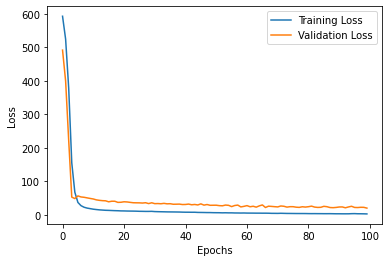

In [16]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming X_train and X_test are defined and initialized previously
# Assuming y_train is also defined and initialized

# Scaling the dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Creating the neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=13))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Visualizing the model architecture
keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# Assuming you have defined your training data X_train and y_train
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05)

# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [17]:
#Evaluation of the model
y_pred = model.predict(X_test)
mse_nn, mae_nn = model.evaluate(X_test, y_test)
print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

4/4 [==============================] - 0s 6ms/step - loss: 11.8925 - mae: 2.2676
Mean squared error on test data:  11.892463684082031
Mean absolute error on test data:  2.2675862312316895


In [18]:
#Comparison with traditional approaches
#First let's try with a simple algorithm, the Linear Regression:
from sklearn.metrics import mean_absolute_error
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error on test data: ', mse_lr)
print('Mean absolute error on test data: ', mae_lr)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

Mean squared error on test data:  25.01767202384286
Mean absolute error on test data:  3.1499233573458034
0.8378310222849991


In [19]:
# Predicting RMSE the Test set results
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

3.448545294335442


In [20]:
# Make predictions on new data
import sklearn
new_data = scaler.transform([[0.1, 10.0, 5.0, 0, 0.4, 6.0, 50, 6.0, 1, 400, 20, 300, 10]])  # Scaling new data
prediction = model.predict(new_data)
print("Predicted house price:", prediction)

1/1 [==============================] - 0s 246ms/step
Predicted house price: [[14.101335]]
